# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Data processing

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
sns.set_context("talk")

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.dtypes

temperature    float64
gender          object
heart_rate     float64
dtype: object

In [4]:
set(df.gender)

{'F', 'M'}

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


<IPython.core.display.Javascript object>


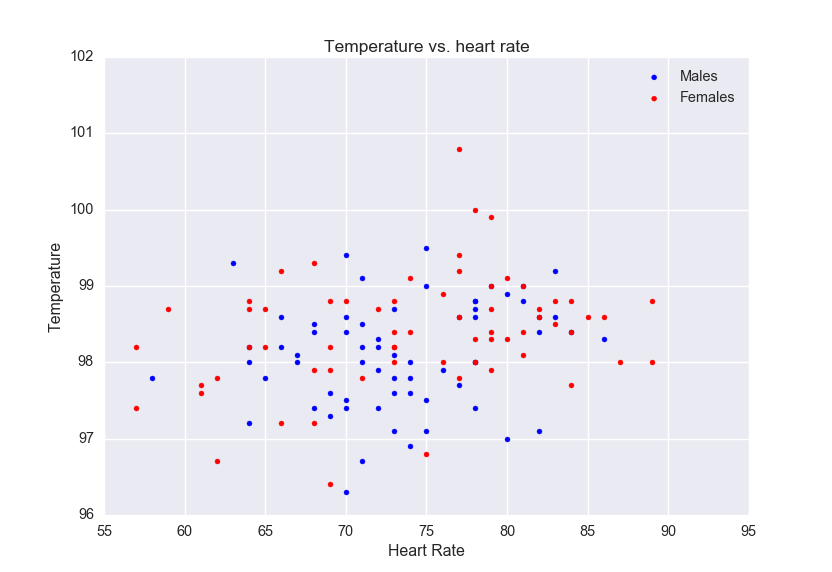

In [6]:
#take a look at the data
plt.figure()
plt.scatter(df[df.gender=='M'].heart_rate,df[df.gender=='M'].temperature,color='b', label='Males')
plt.scatter(df[df.gender=='F'].heart_rate,df[df.gender=='F'].temperature,color='r', label='Females')
plt.legend()
plt.ylabel('Temperature')
plt.xlabel('Heart Rate')
plt.title('Temperature vs. heart rate');

## Is the distribution of body temperatures normal?

In [7]:
from scipy.stats import norm, skew

<IPython.core.display.Javascript object>


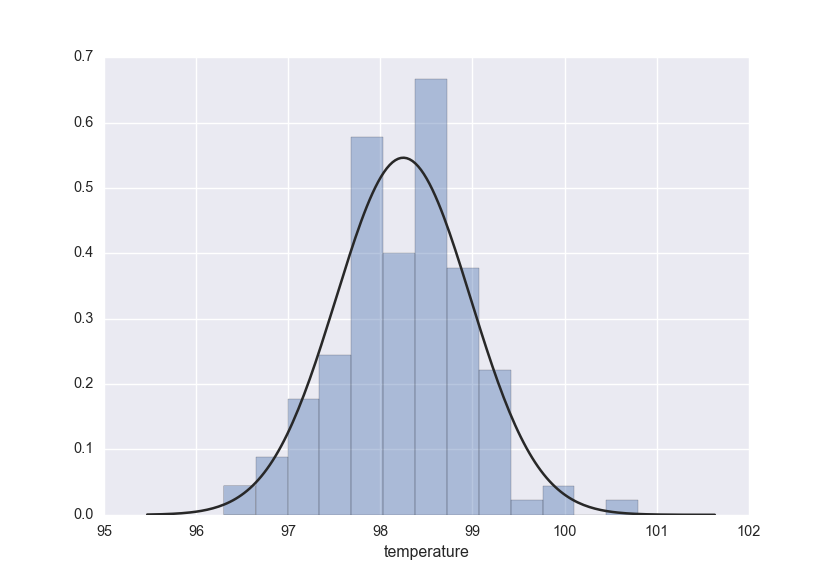

mu: 98.24923076923075, sigma: 0.730357778905038
skew: -0.004367976879081625


In [8]:
sns.distplot(df.temperature, fit=norm, kde=False)
mu, sigma = norm.fit(df.temperature)
skew = skew(df.temperature) #value near 0 is not skewed
print('mu: {0}, sigma: {1}'.format(mu,sigma))
print('skew: {}'.format(skew))
#df.groupby(df.temperature).size().plot(kind='bar')

The distribution is very close to a normal distribution (depicted in the black line, fitted by scipy.stats.norm), as seen by the near zero skewness parameter (calculated by scipy.stats.skew).

## Is the sample size large? Are the observations independent?

A general metric resulting from the Central Limit Theorem is that your sample must contain at least 30 measurements of each category; in this case we need at least 30 samples of female and male genders. For the observations to be considered independent, the observations should be randomly obtained, and we'd expect the observations to be normally distributed.

##    Is the true population mean really 98.6 degrees F?
        Would you use a one-sample or two-sample test? Why?
        In this situation, is it appropriate to use the tt or zz statistic?
        Now try using the other test. How is the result be different? Why? 

To test if the true population mean is 98.6 F, we will use a one-sample test, since we do not have separate populations that we want to compare to each other, but we want to compare all of our sample data to the expected mean. Because we don't know what the population standard deviation is, we will use the t distribution.

In [9]:
from scipy.stats import ttest_1samp

ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t-test says that the sample mean is 5.5 standard deviations from the population mean, and that it is statistically different from the population mean. The true population mean temperature is not 98.6 F.

## At what temperature should we consider someone's temperature to be "abnormal"?
        Start by computing the margin of error and confidence interval. 
    

Let's define a temperature as "abnormal" when it is different from "normal" to a significance level of 5%. The margin of error is the product of the t-score with confidence level of 95% and of the standard error. 

In [10]:
t95perc = 1.984
standard_error = sigma/np.sqrt(len(df))
margin_error = t95perc*standard_error
print('Margin of error: {:.3f}'.format(margin_error))

Margin of error: 0.127


Since we now know that the population mean is not 98.6 F, we will use our sample mean as the new estimate for the population mean temperature, which is mu = 98.2 F. The confidence interval is mu +/- margin_error.

In [11]:
print('Confidence interval: ({0:.1f}, {1:.1f})'.format(mu-margin_error,mu+margin_error))

Confidence interval: (98.1, 98.4)


So temperatures less than 98.1 and larger than 98.4 should be considered "abnormal."

## Is there a significant difference between males and females in normal temperature?
    What test did you use and why?

First check that there are at least 30 male and 30 female samples. To test significance between these two distributions, I'd use a two-sample t-test, since we want to compare the means of two sets of samples, males and females.

In [12]:
df.groupby('gender').size()

gender
F    65
M    65
dtype: int64

We have a balanced set of samples with 65 datapoints each, which is more than 30 samples. Before we calculate the t-test, let's take a look at the distributions.

<IPython.core.display.Javascript object>


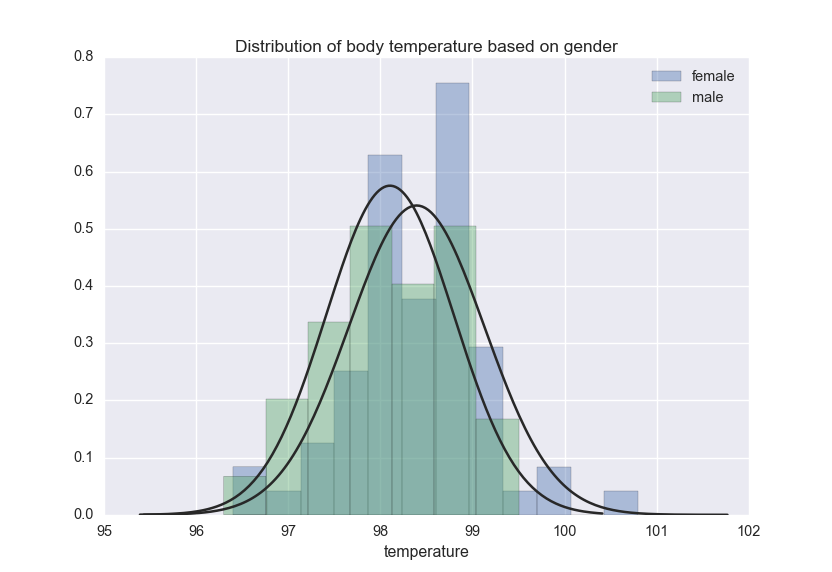

In [13]:
sns.distplot(df[df.gender == 'F'].temperature, fit=norm, kde=False,label='female')
sns.distplot(df[df.gender == 'M'].temperature, fit=norm, kde=False,label='male')
plt.legend()
plt.title('Distribution of body temperature based on gender');

In [14]:
muf, sigmaf = norm.fit(df[df.gender=='F'].temperature)
mum, sigmam = norm.fit(df[df.gender=='M'].temperature)
print('female distribution - mu: {0}, sigma: {1}'.format(muf,sigmaf))
print('male distribution - mu: {0}, sigma: {1}'.format(mum,sigmam))

female distribution - mu: 98.39384615384614, sigma: 0.7377464486428966
male distribution - mu: 98.10461538461537, sigma: 0.6933598841828699


Is this difference statistically significant? the mean for females is 98.4, or 0.3 degrees higher than the mean for men, which is 98.1. The null hypothesis is that the female and male distributions have the same mean. The test will be two-sided.

In [15]:
from scipy.stats import ttest_ind

t,pval = ttest_ind(df[df.gender=='F'].temperature, df[df.gender=='M'].temperature,axis=0)
print('Test statistic: {:.3f}'.format(t))
print('P value: {:.3f}'.format(pval))

Test statistic: 2.285
P value: 0.024


As the p-value is 0.02, and less than the standard threshold of 0.05, we reject the null hypothesis that the mean for females is the same for males. 

## Write a story with your conclusion in the context of the original problem. 


For 120 years, we've held that normal body temperature is 98.6 F. However, with a sample of 130 people, half men, half women, we see that 98.6 F is statistically higher than the mean of our sample which was 98.2 F. How is this so? it is possible that his tools were not as accurate as the tools we use now, and that biased his measurements. Not knowing the demographics of his sample, if he measured more women, who have a higher average temperature by 0.3 F, the average temperature would have been higher. Additionally, it is known that our temperature varies within a day, but we don't know when Wunderlich collected his data, or when our current dataset was collected.